In [1]:
import torch
import numpy as np
import seaborn as sns
import itertools
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

MODEL_PATH = "/home/tigeriv/Code/NeuralBKI/Models/Weights/ConvBKI_SIN_02_V/filters1.pt"
CLASS_NUM = 19
RES = 0.1
NUM_POINTS = 10e4

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams.update({'font.size': 22})

In [2]:
kernels = torch.load(MODEL_PATH).detach().cpu().numpy()

In [3]:
def gen_points_batch(bounds, res, num_samples, kernel):
    # Generate points with rejection sampling
    new_points = np.random.uniform(low=bounds[0], high=bounds[1], size=(num_samples, 3))
    grid_inds = np.floor((new_points - bounds[0]) / res).astype(np.byte)
    point_vals = kernel[grid_inds[:, 0], grid_inds[:, 1], grid_inds[:, 2]]
    accept_probs = np.random.uniform(size=(num_samples))
    points = np.vstack(new_points)
    accepted_points = points[point_vals > accept_probs, :]
    return accepted_points

In [4]:
def plot_kernel(kernels, class_num, res, num_points):
    # Load kernel
    kernel = kernels[class_num, 0, :, :, :]
    filter_size = kernel.shape[0]
    
    print("Generating Points")
    # Generate points with rejection sampling
    i = 0
    points = None
    bounds = [-filter_size/2 * res, filter_size/2 * res]
    while i < num_points:
        new_points = gen_points_batch(bounds, res, int(num_points * 100), kernel)
        if points is None:
            points = new_points
        else:
            points = np.vstack((points, new_points))
            i = points.shape[0]
    
    # Turn to distances
    horiz_dists = np.linalg.norm(points[:, :2], axis=1)
    vert_dists = np.abs(points[:, 2])
    dists = np.transpose(np.vstack((horiz_dists, vert_dists)))
            
    print("Plotting")
    # Plot
    df = pd.DataFrame(dists, columns=["H", "Z"])
    sns.kdeplot(
        data=df, x="H", y="Z",
        fill=True, thresh=0, levels=10, cmap="viridis",
    )

In [5]:
# plot_kernel(kernels, 9, RES, NUM_POINTS)

In [6]:
def class_str(class_num):
    classes = {
        0: "None",
        1: "Car", 
        2: "Bicycle", 
        3: "Motorcycle",
        4: "Truck",
        5: "Other Vehicle",
        6: "Person", 
        7: "Bicyclist", 
        8: "Motorcyclist",
        9: "Road", 
        10: "Parking",
        11: "Sidewalk",
        12: "Other ground",
        13: "Building", 
        14: "Fence",
        15: "Vegetation",
        16: "Trunk",
        17: "Terrain",
        18: "Pole",
        19: "Traffic Sign"
    }
    return classes[class_num]

In [7]:
def plot_heatmap(kernels, class_num):
    plt.figure()
    kernel = kernels[class_num, 0, :, :, :]
    filter_size = kernel.shape[0]
    filter_center = (filter_size - 1) / 2
    kernel_slice = np.transpose(kernel[:, int(filter_center), :])
    ax = sns.heatmap(kernel_slice, cmap="YlGnBu", xticklabels=False, yticklabels=False)
    ax.invert_yaxis()
    ax.set_title(class_str(class_num))
    ax.set_xlabel("X")
    ax.set_ylabel("Z")

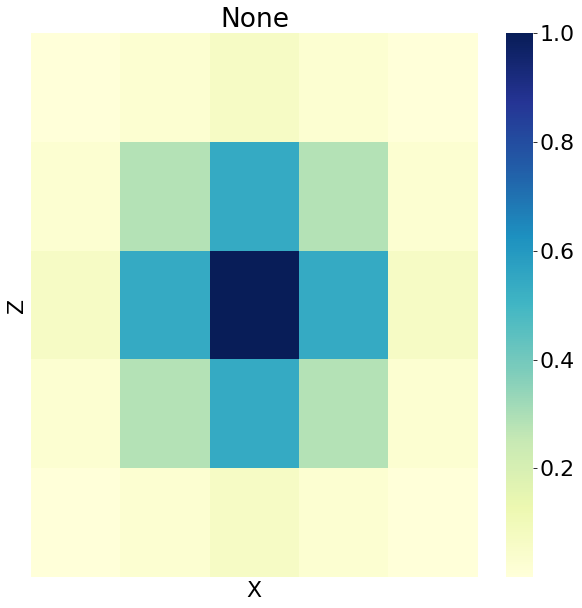

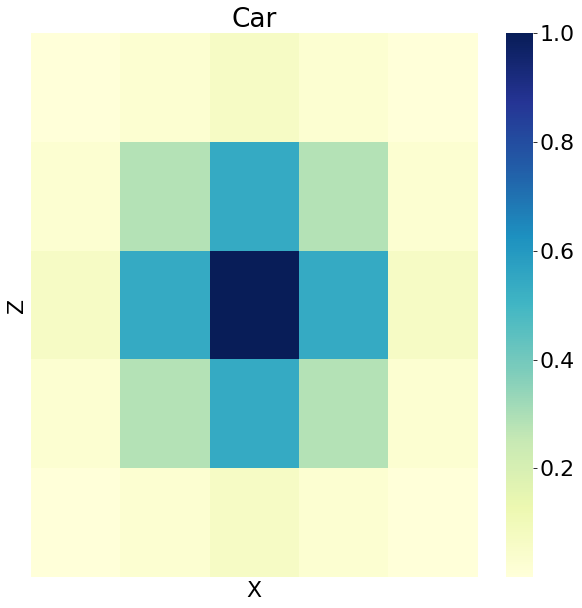

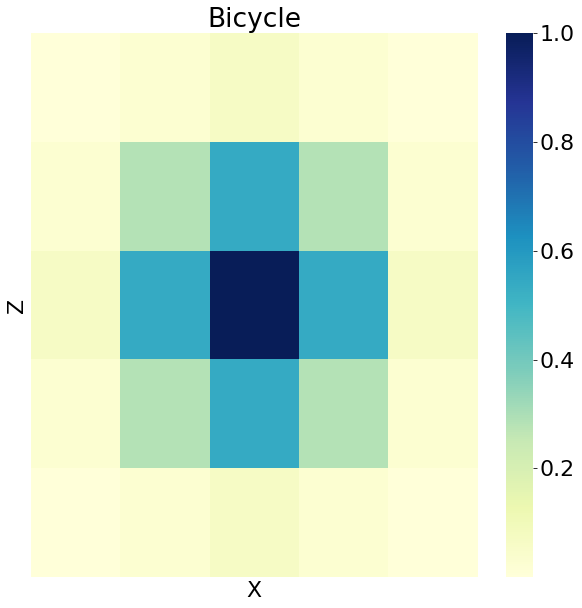

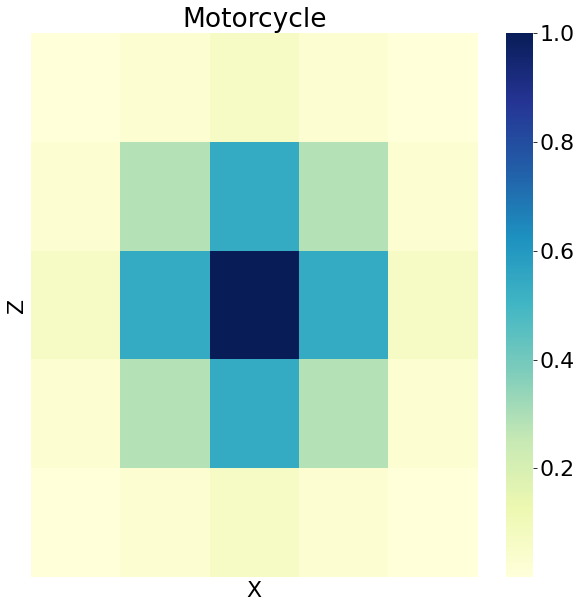

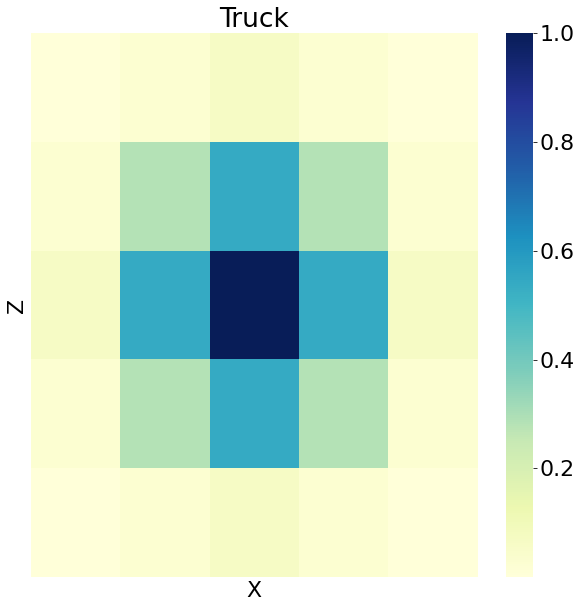

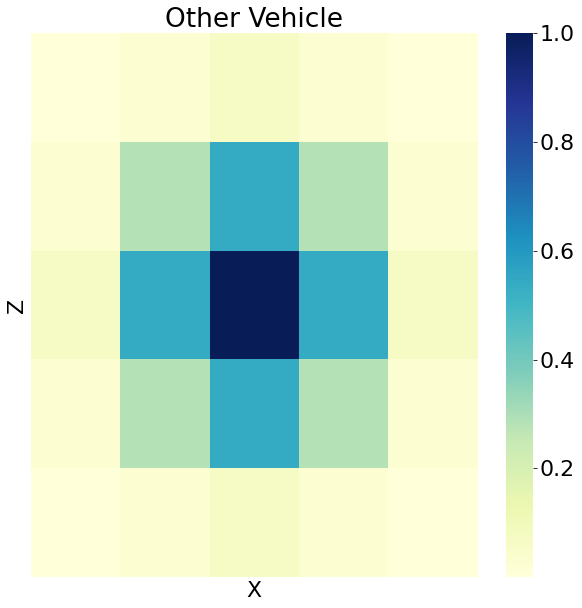

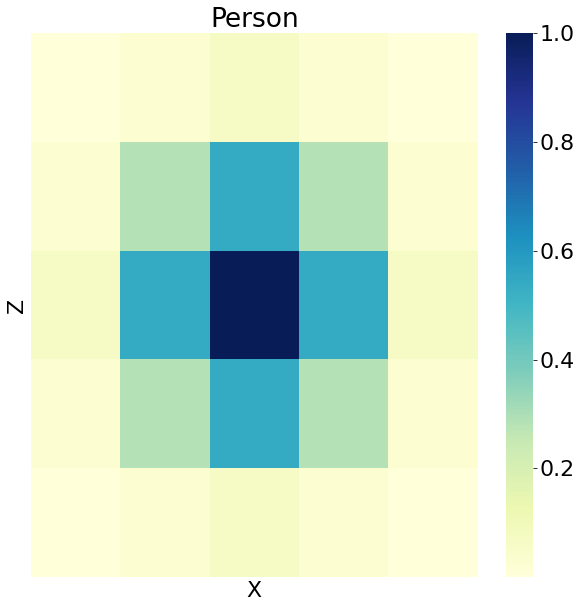

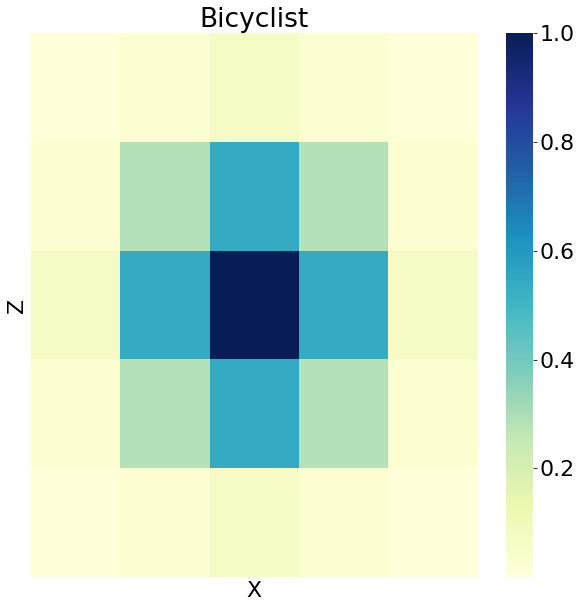

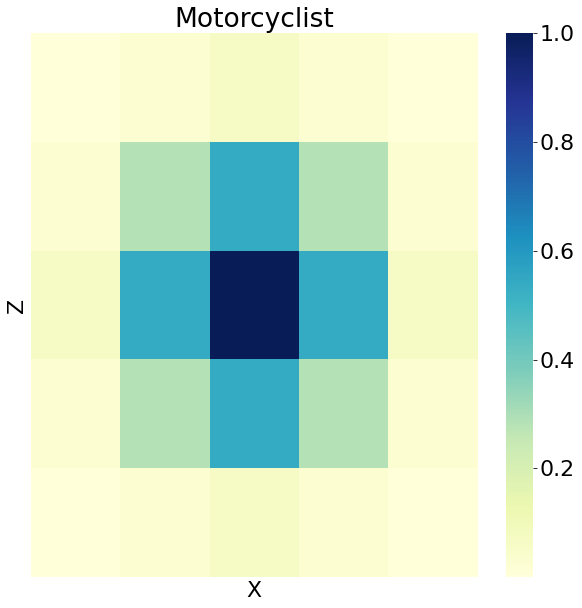

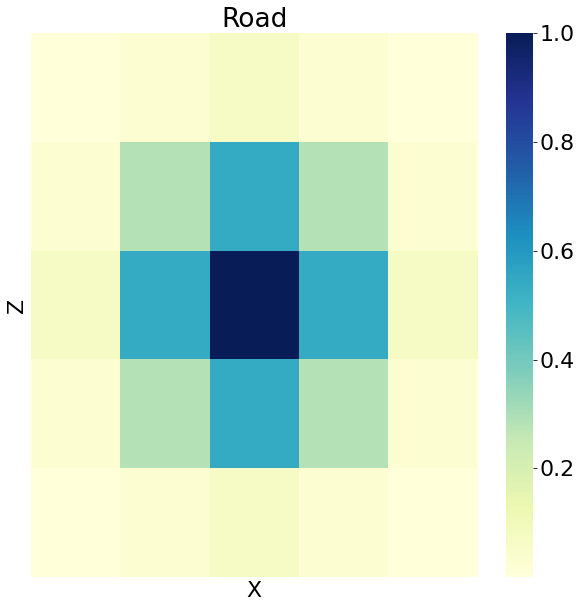

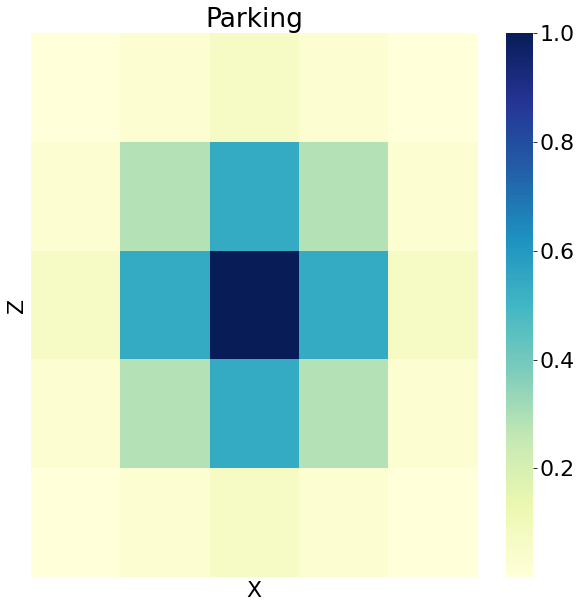

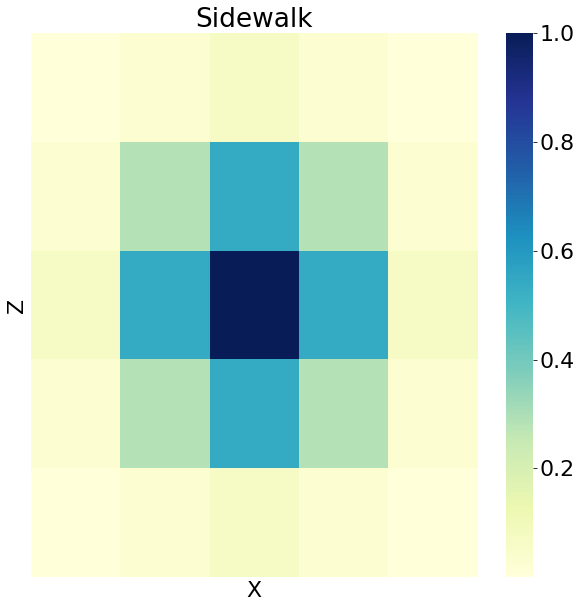

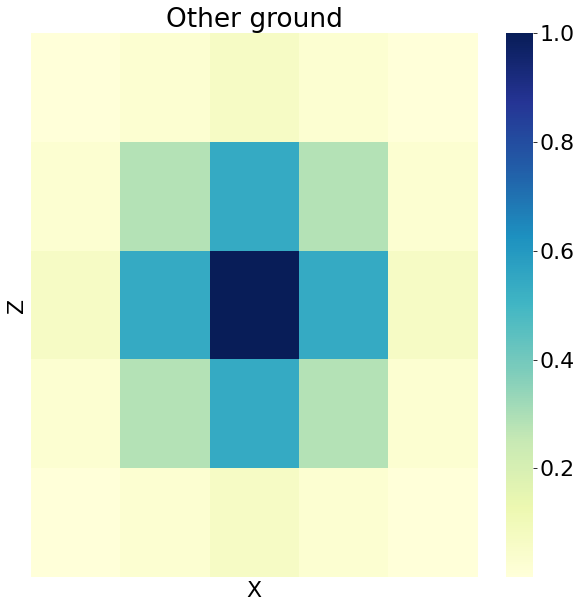

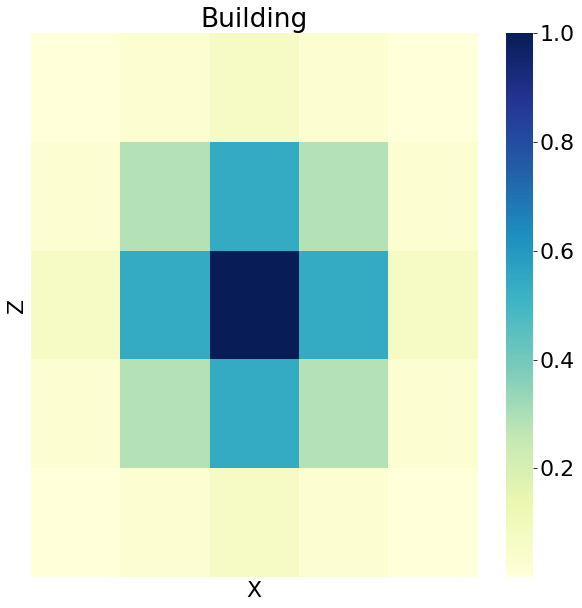

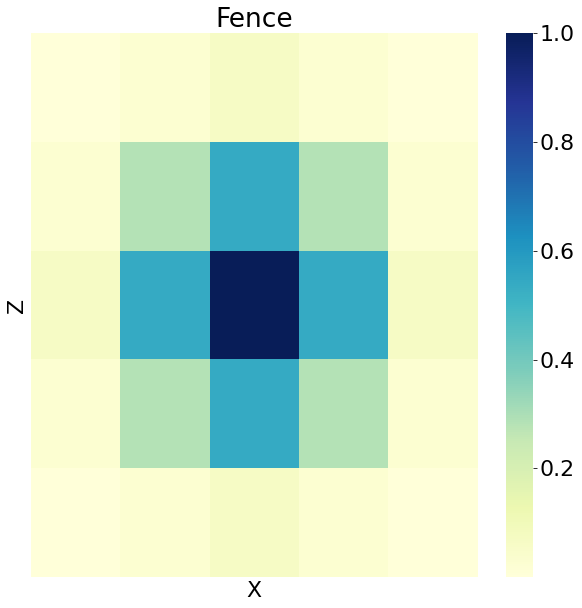

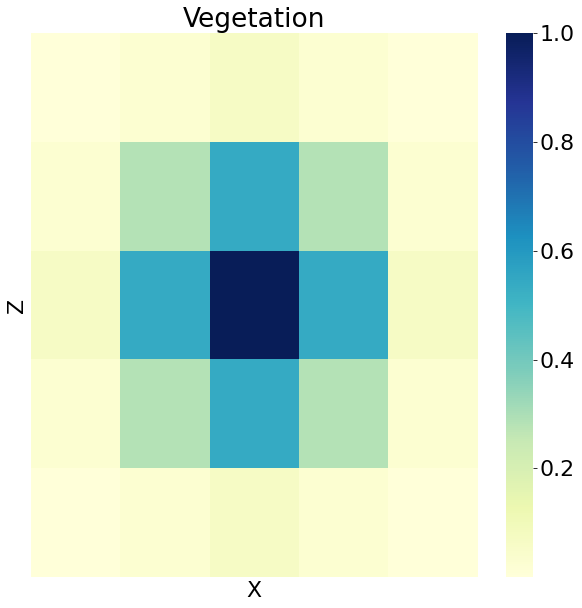

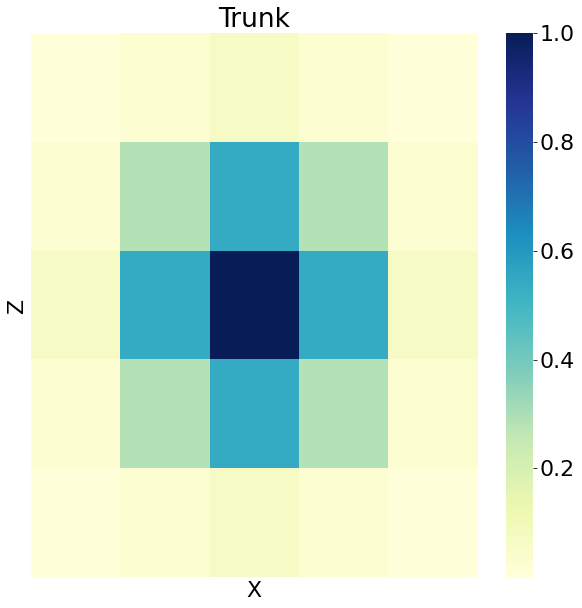

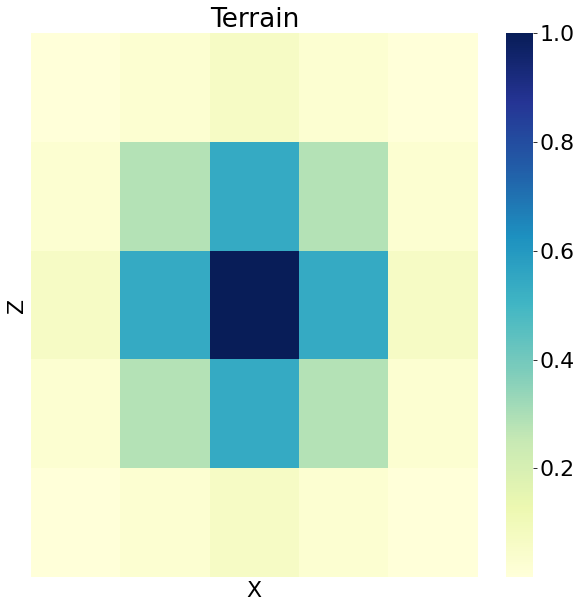

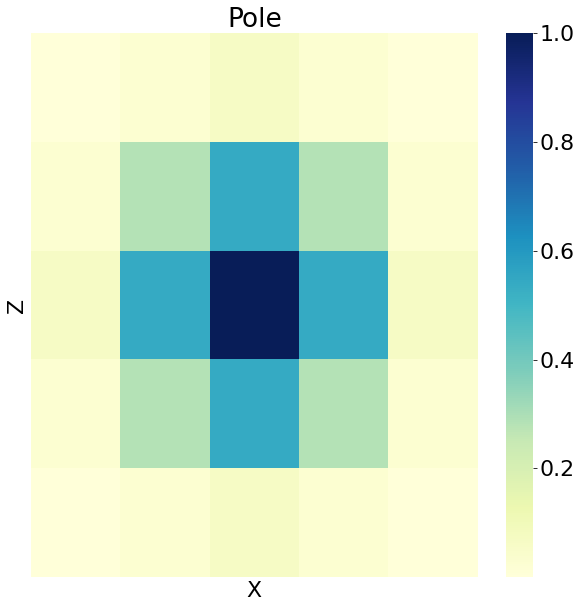

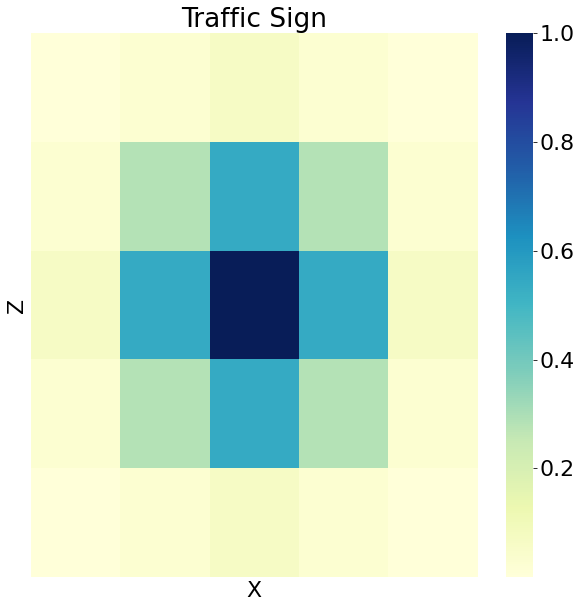

In [8]:
# Single Before
MODEL_PATH = "/home/tigeriv/Code/NeuralBKI/Models/Weights/ConvBKI_SIN_02_V/filters1.pt"
kernels = torch.load(MODEL_PATH).detach().cpu().numpy()
for i in range(20):
    plot_heatmap(kernels, i)

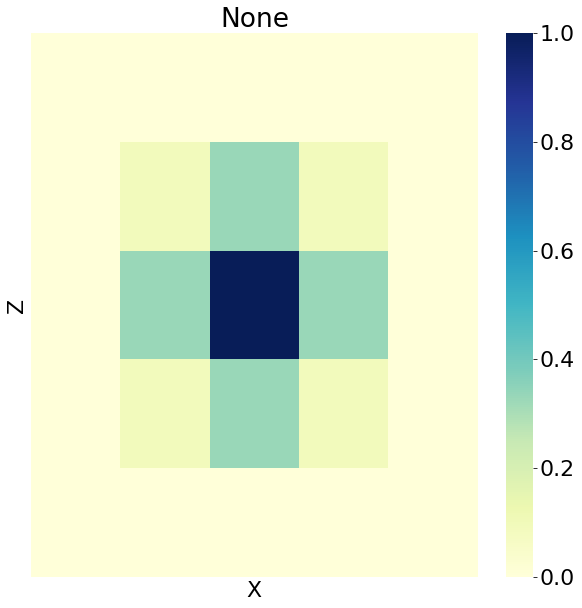

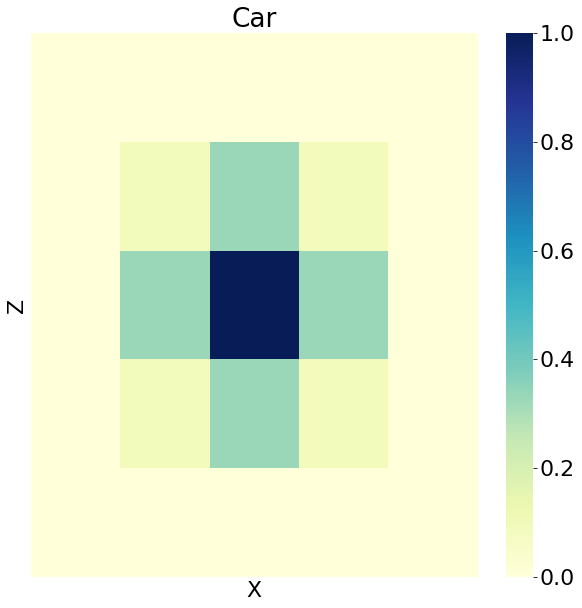

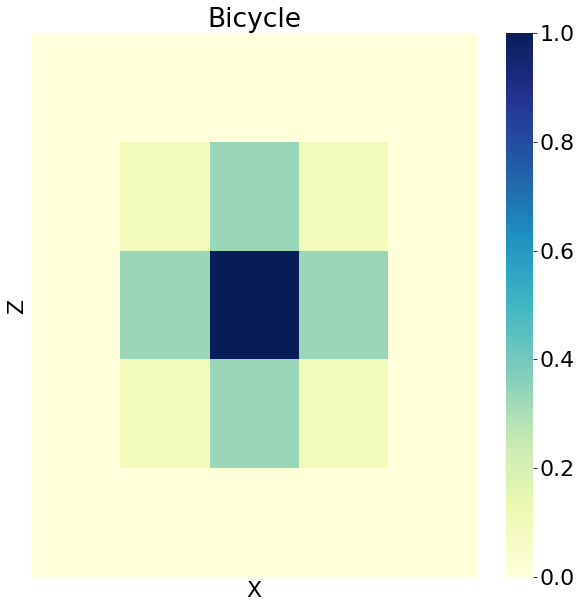

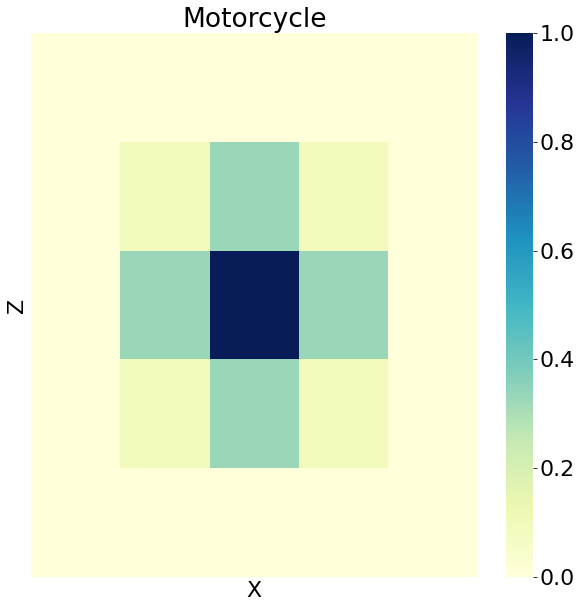

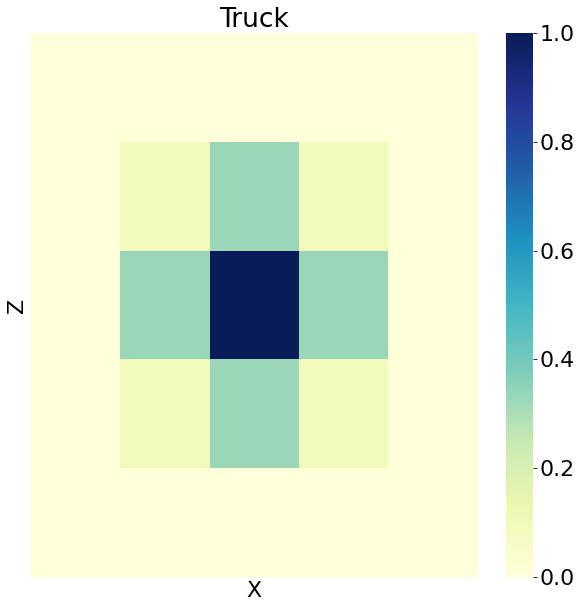

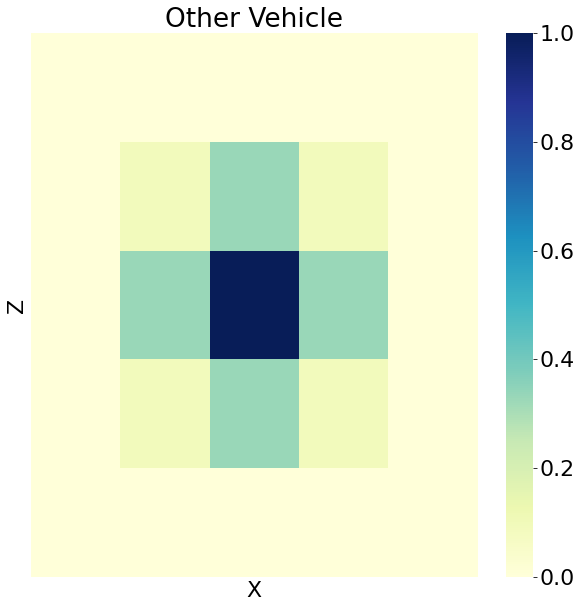

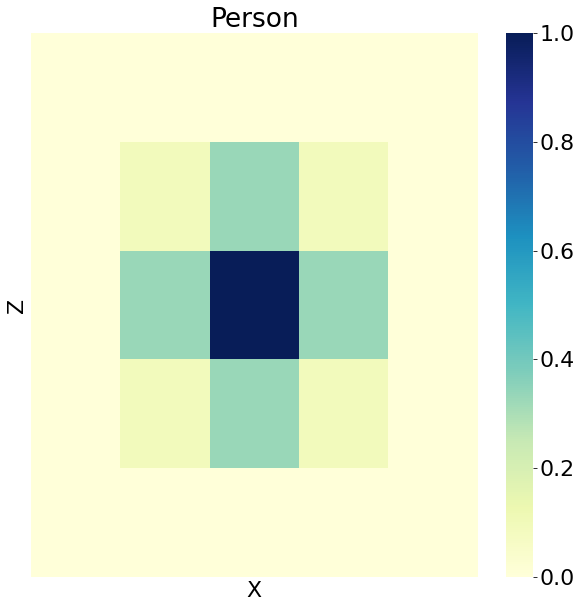

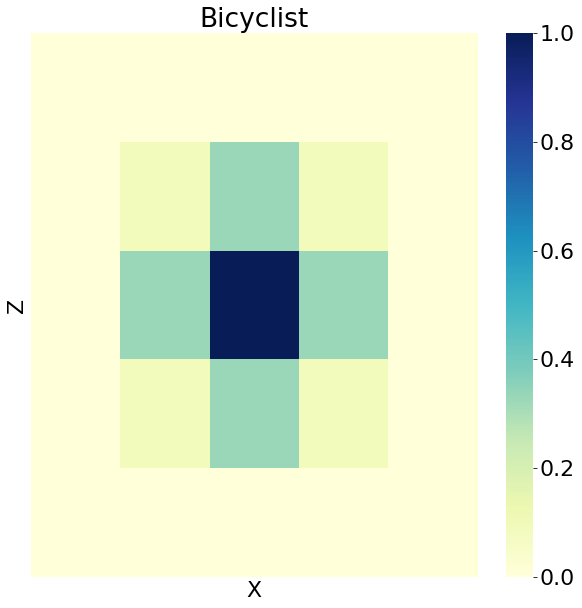

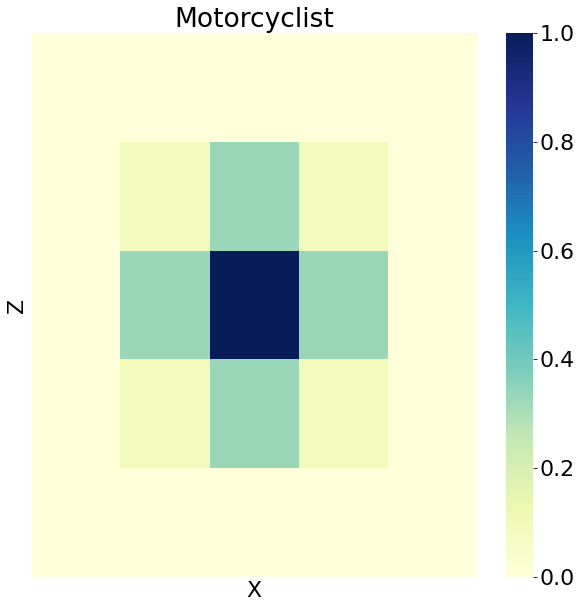

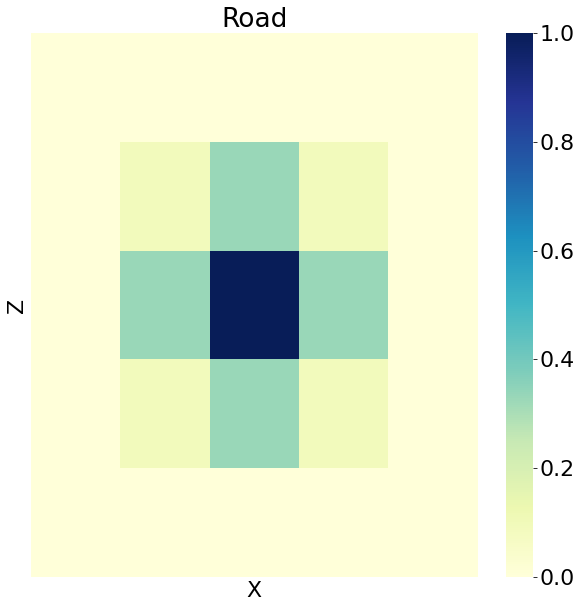

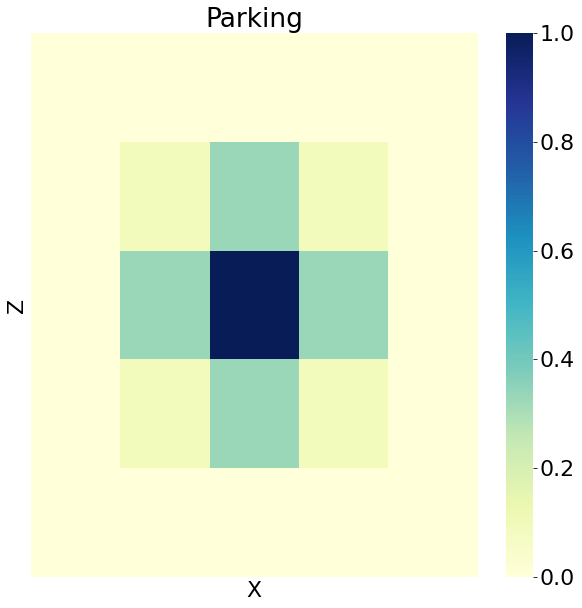

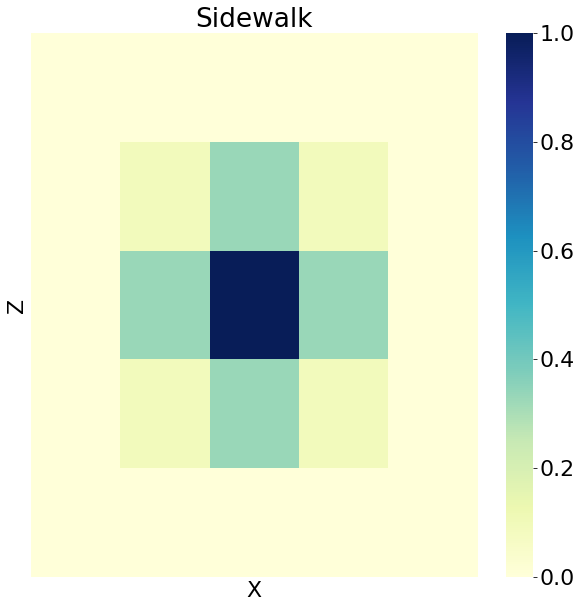

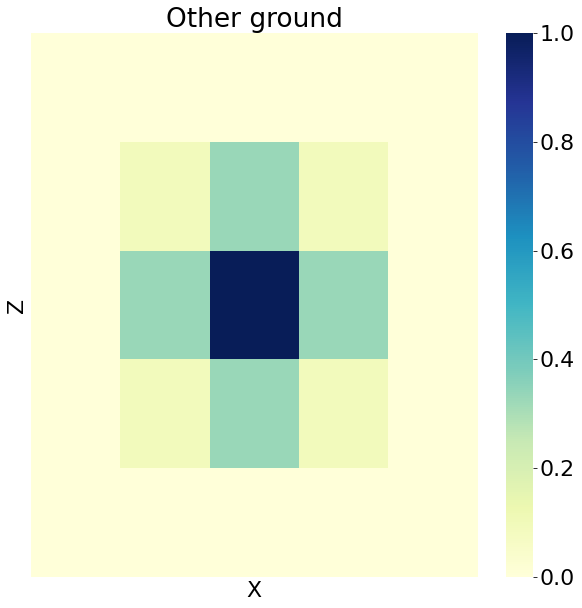

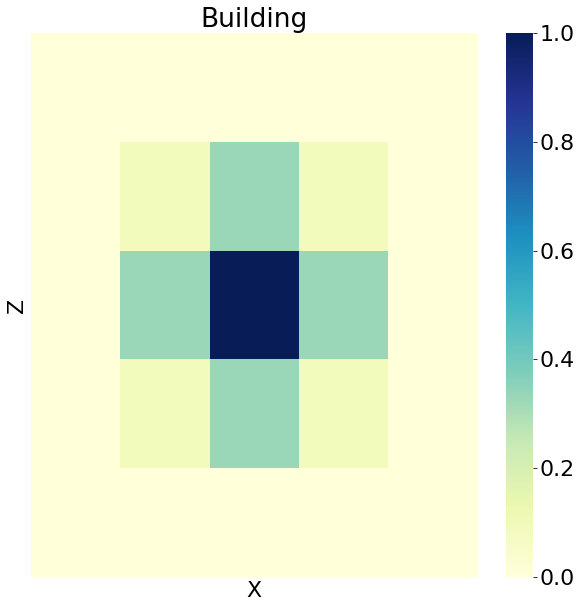

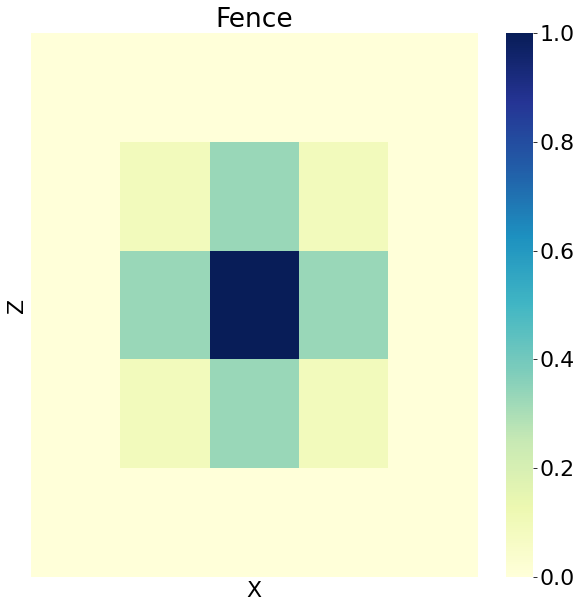

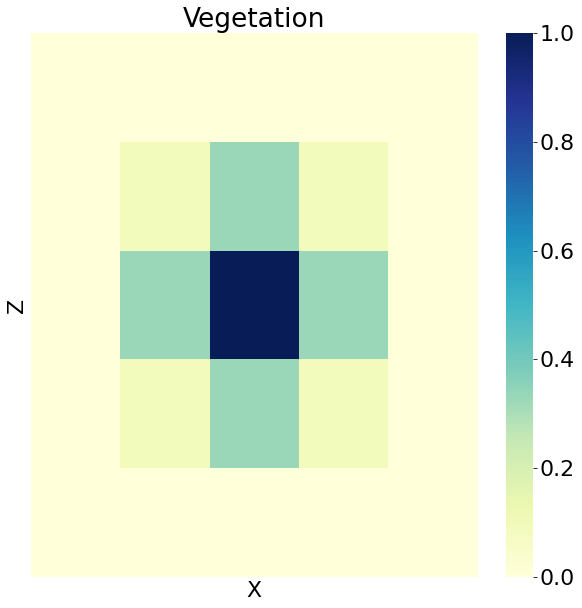

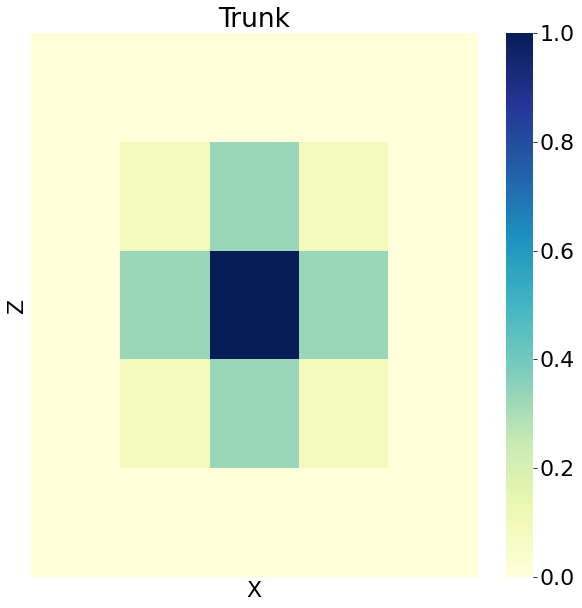

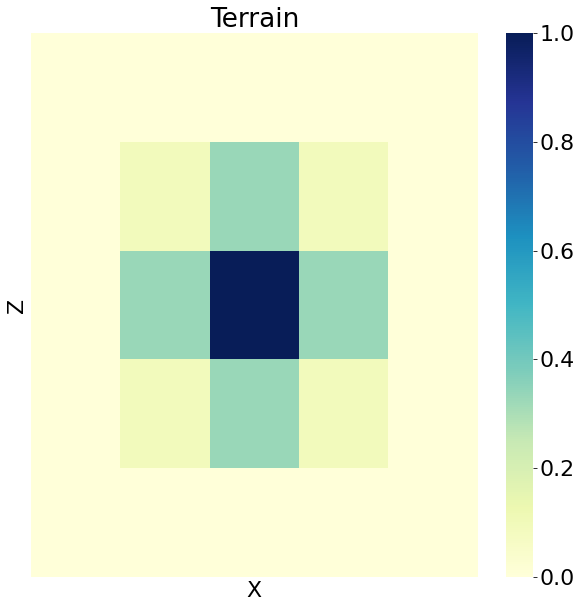

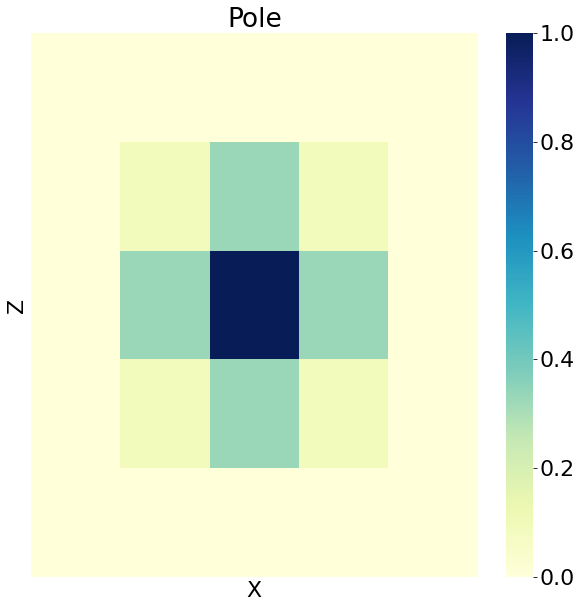

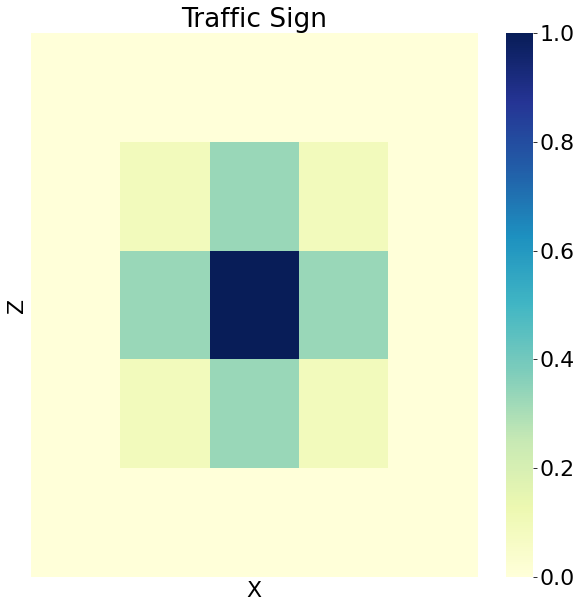

In [9]:
# Single After
MODEL_PATH = "/home/tigeriv/Code/NeuralBKI/Models/Weights/ConvBKI_SIN_02_V/filters0.pt"
kernels = torch.load(MODEL_PATH).detach().cpu().numpy()
for i in range(20):
    plot_heatmap(kernels, i)

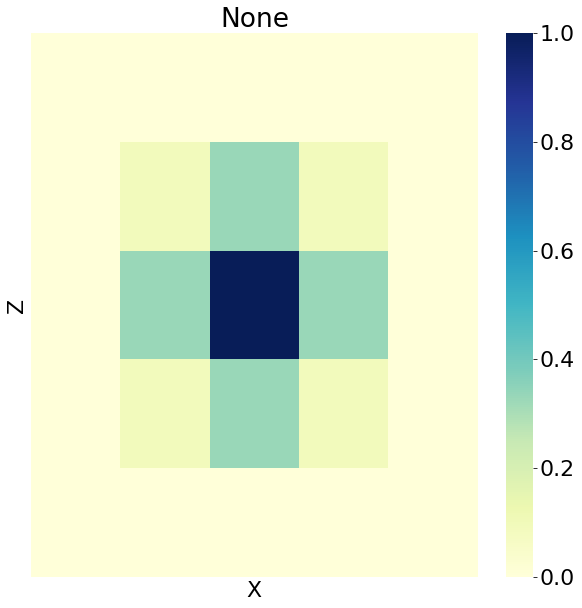

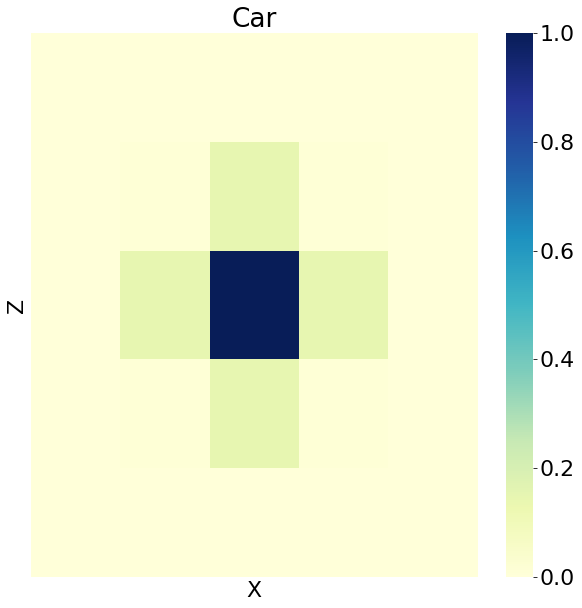

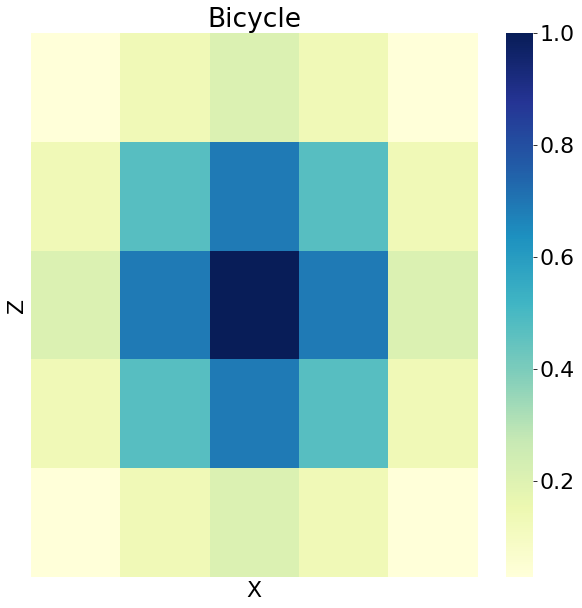

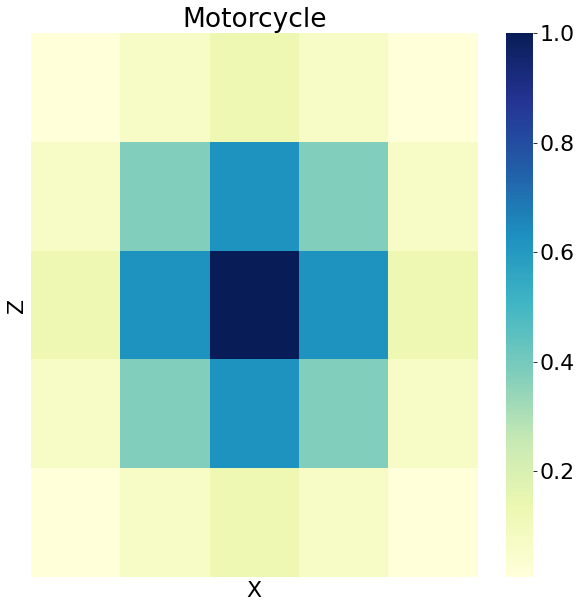

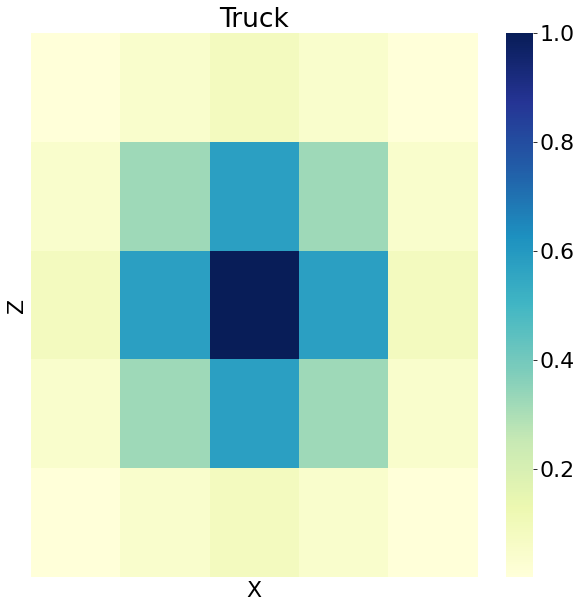

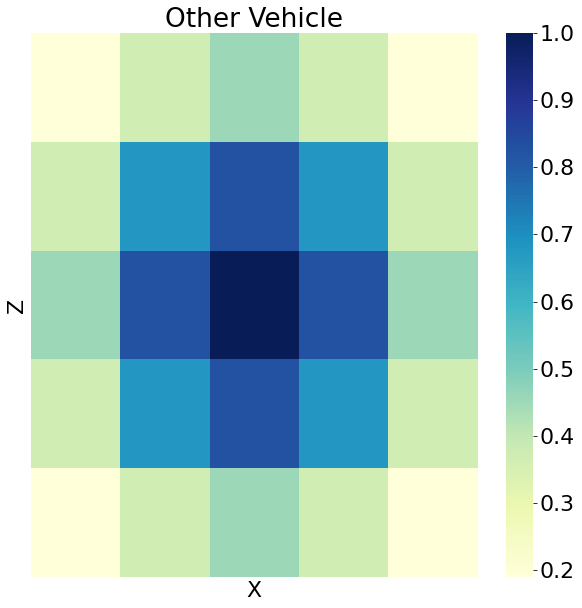

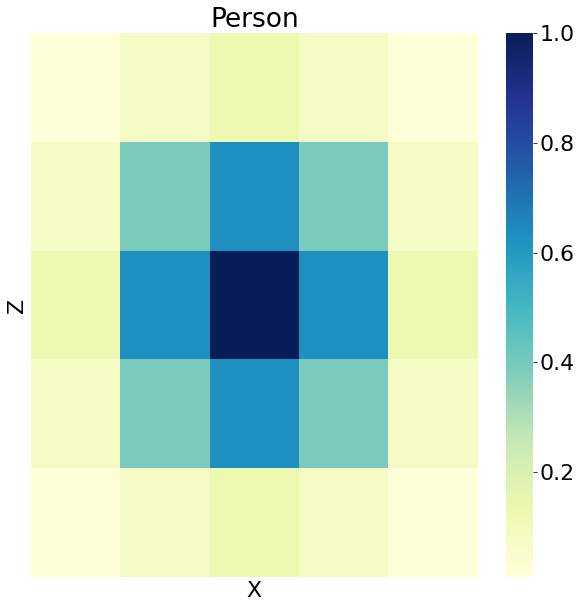

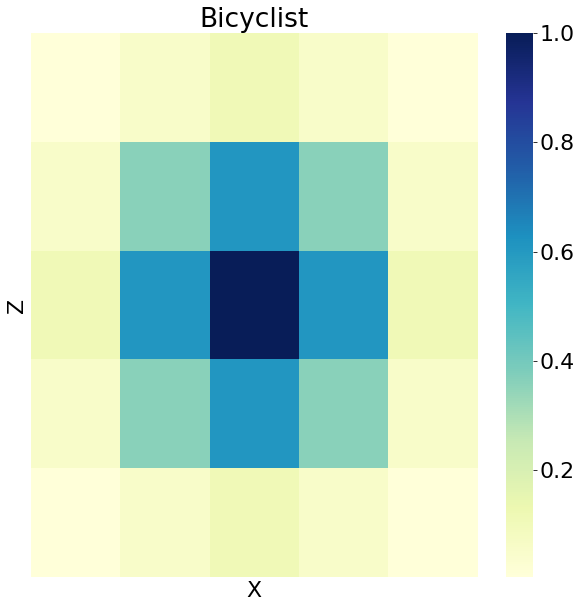

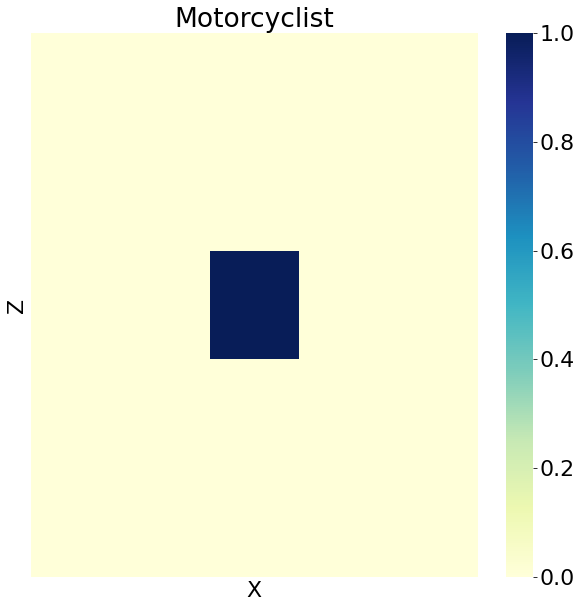

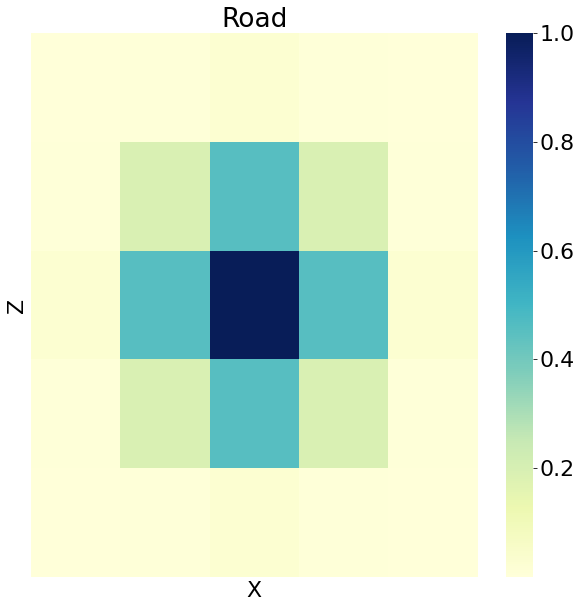

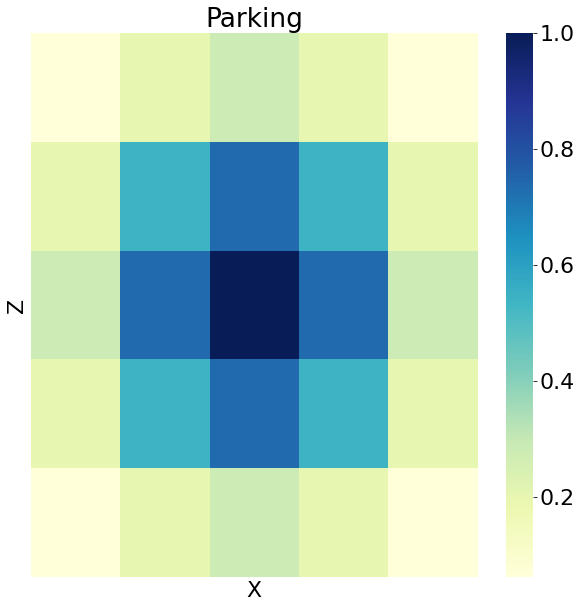

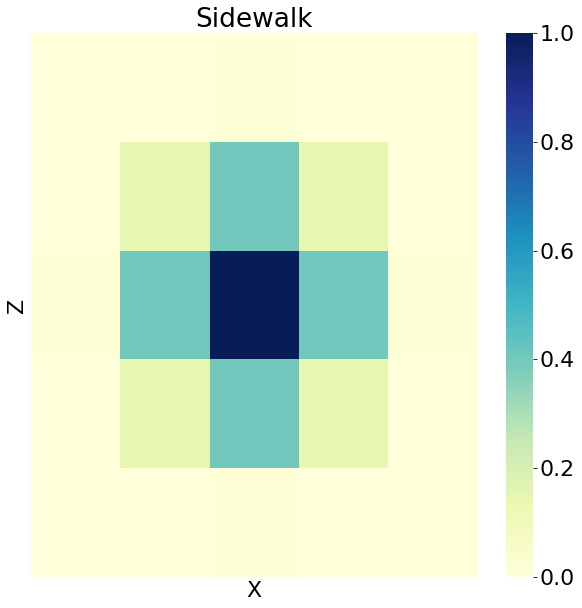

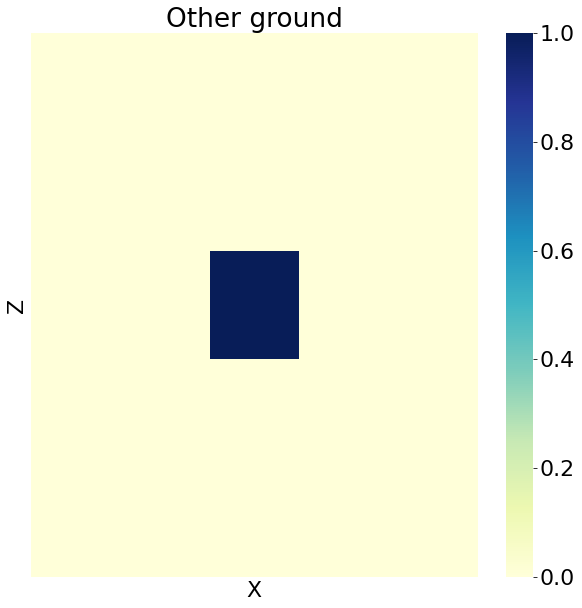

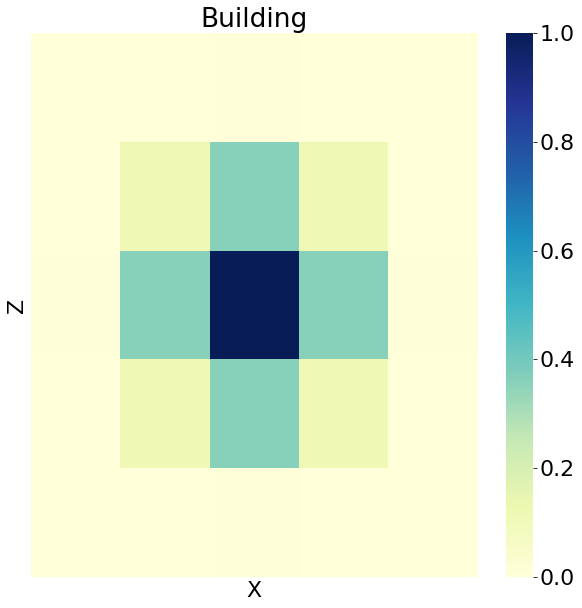

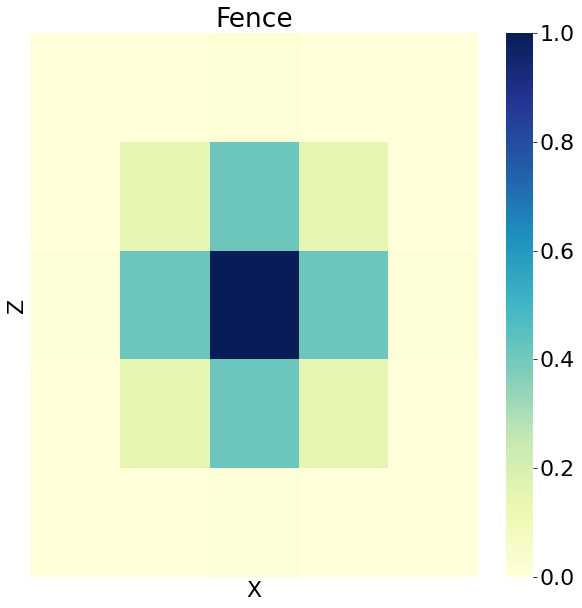

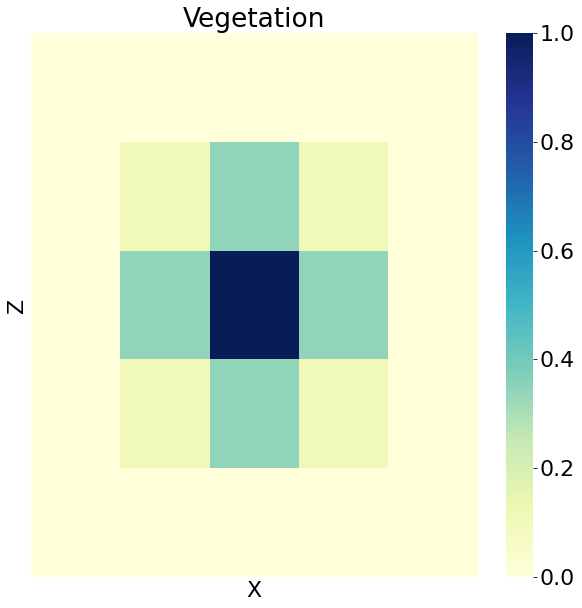

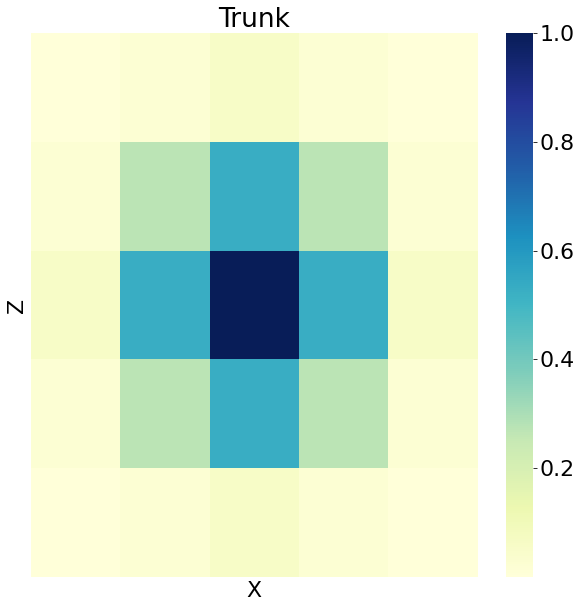

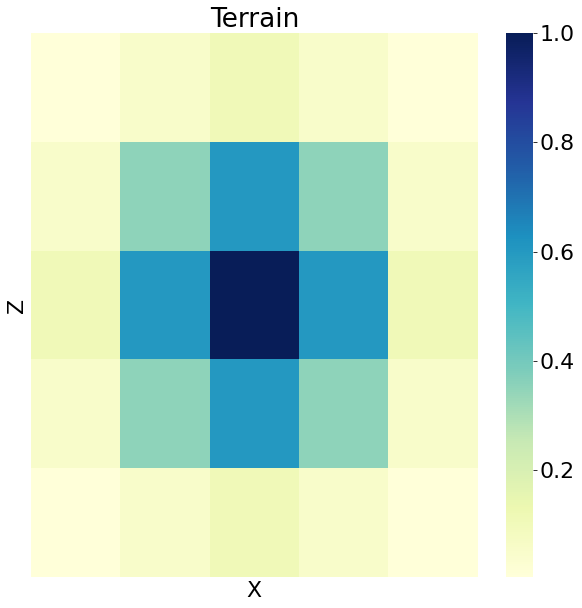

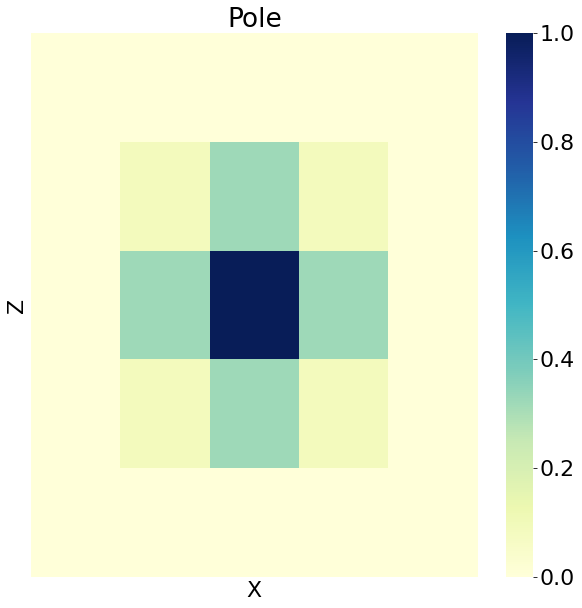

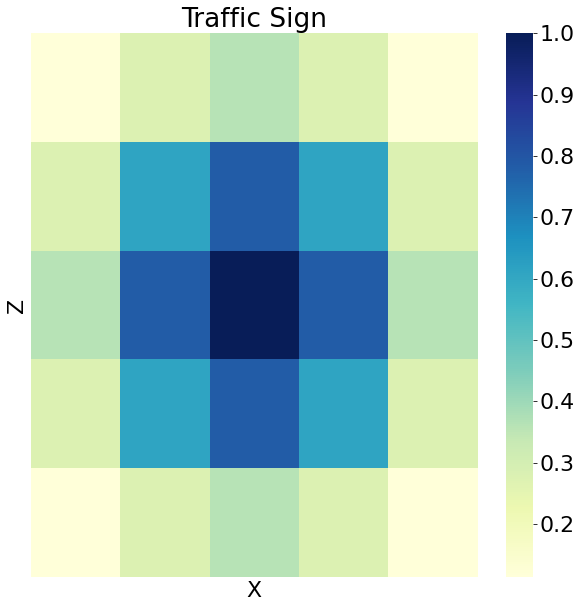

In [10]:
# Per Class
MODEL_PATH = "/home/tigeriv/Code/NeuralBKI/Models/Weights/ConvBKI_PC_02_V/filters1.pt"
kernels = torch.load(MODEL_PATH).detach().cpu().numpy()
for i in range(20):
    plot_heatmap(kernels, i)

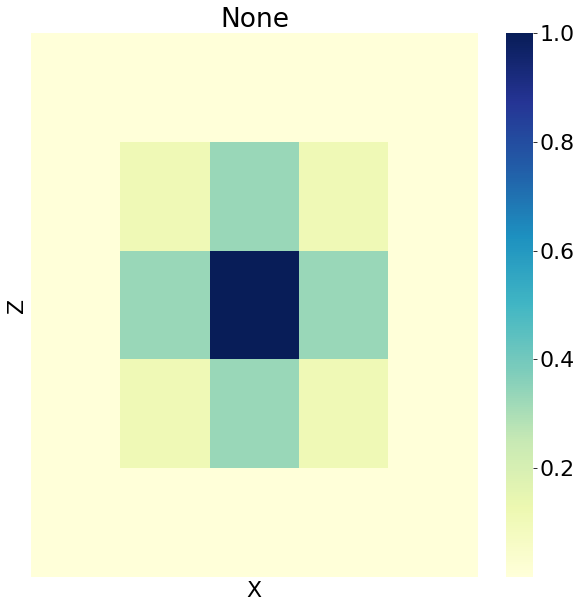

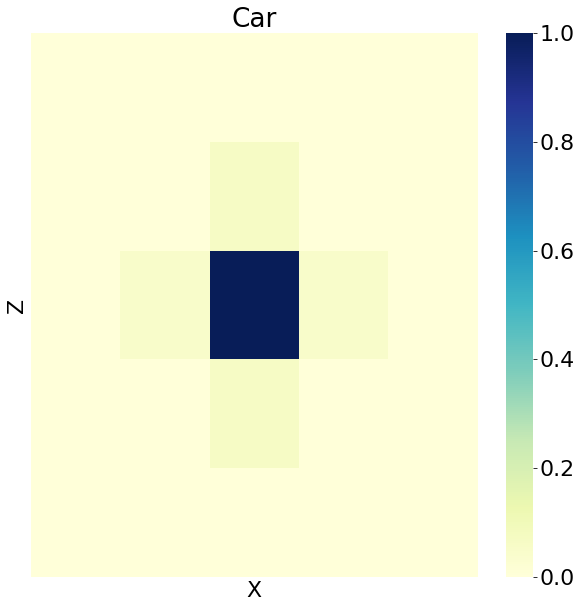

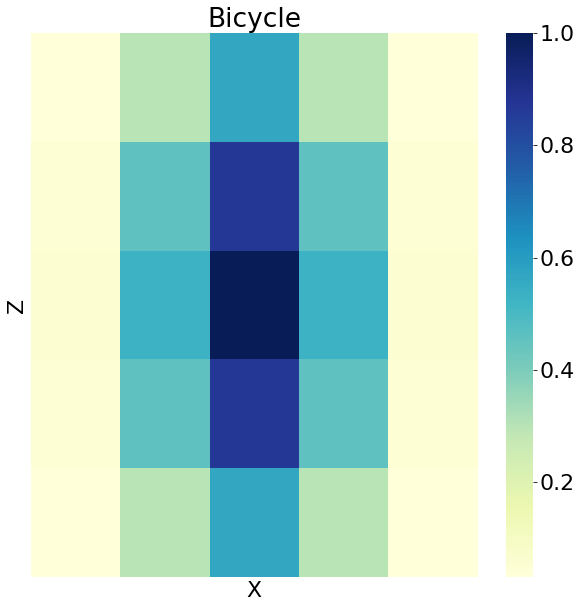

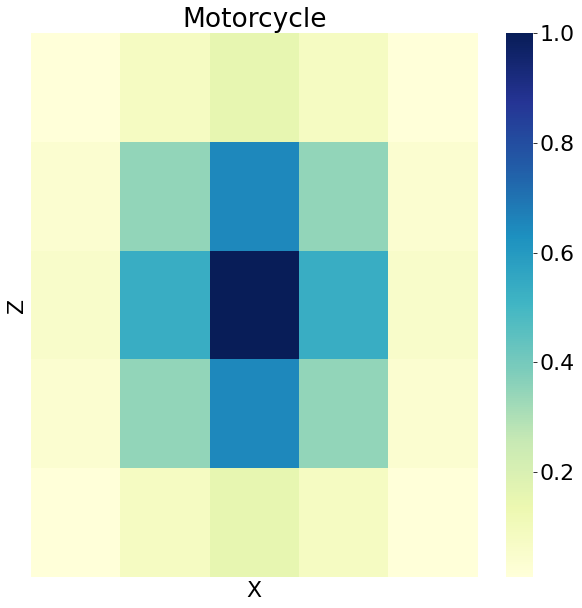

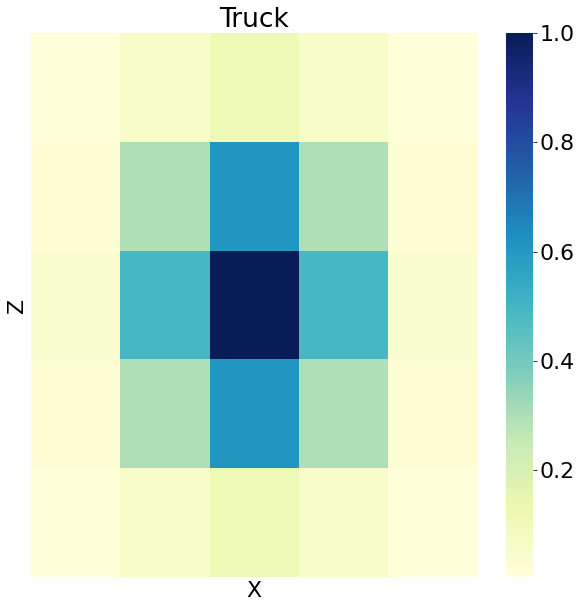

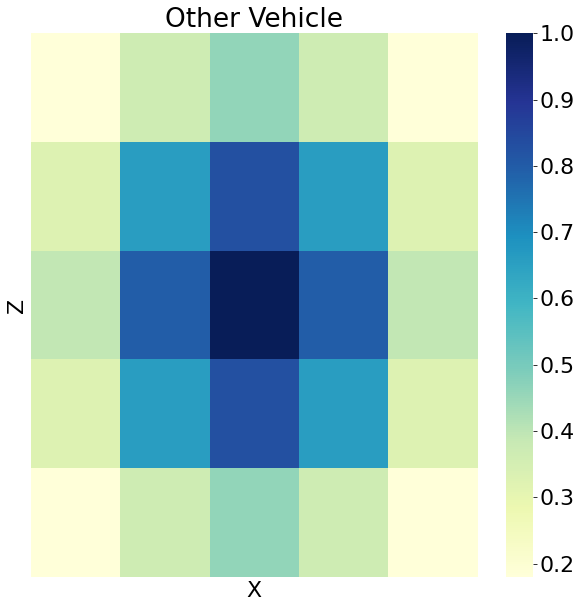

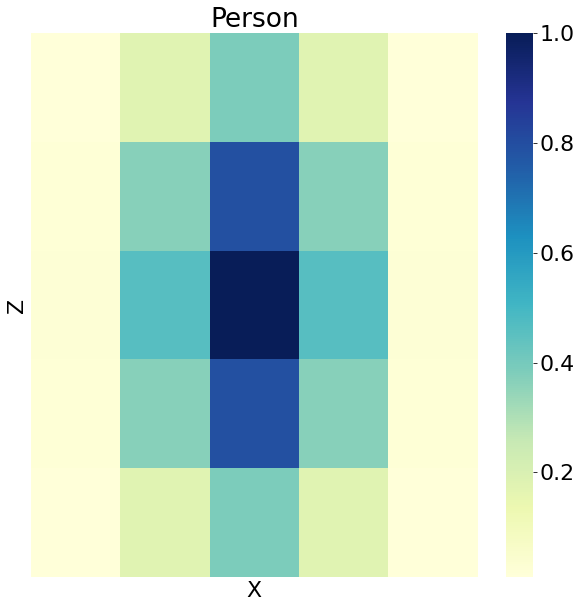

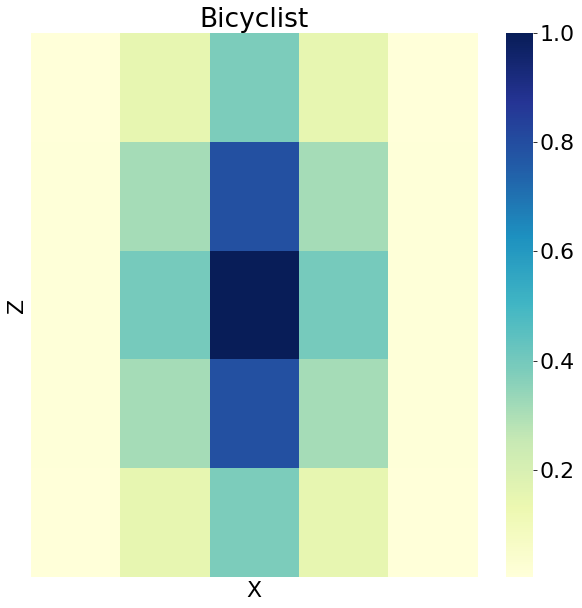

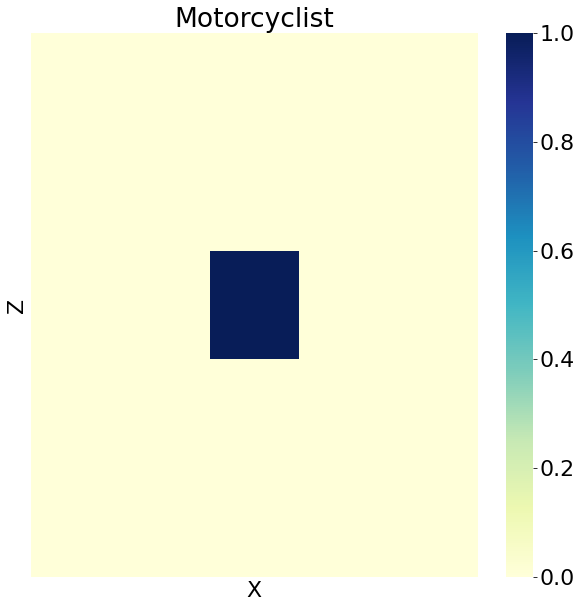

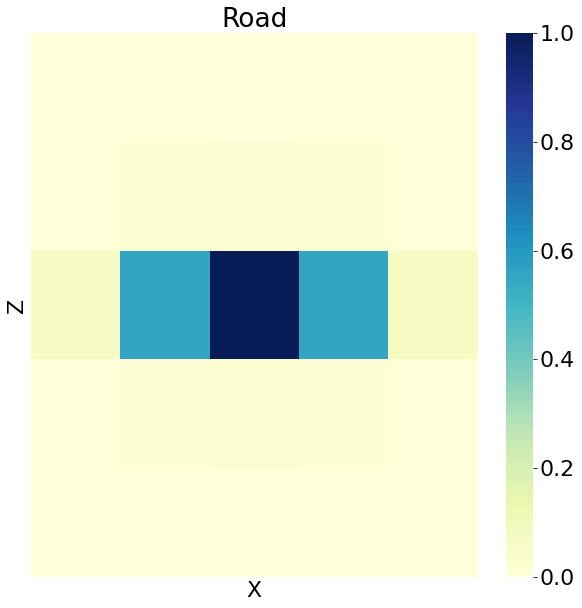

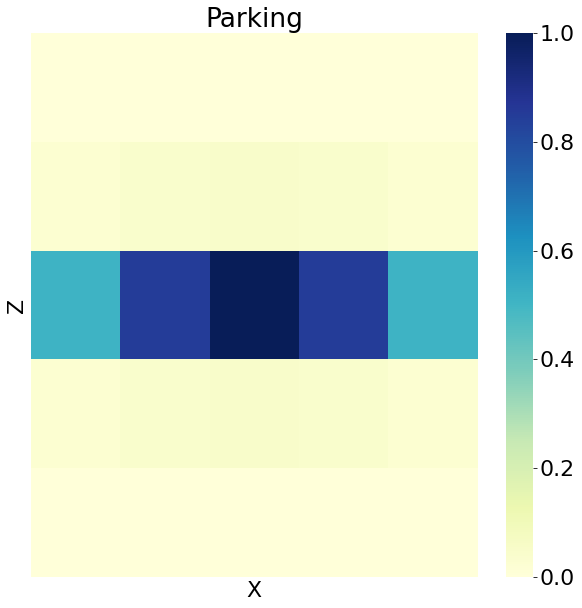

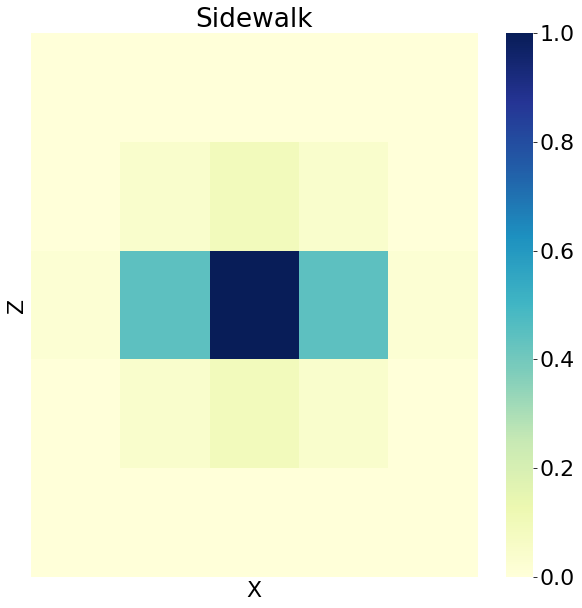

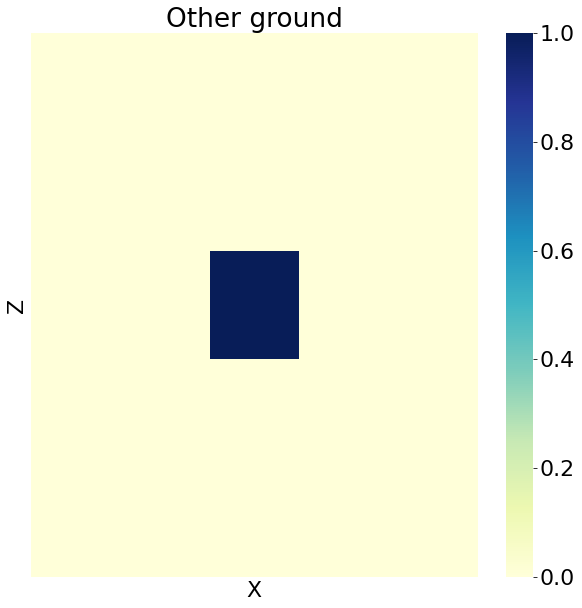

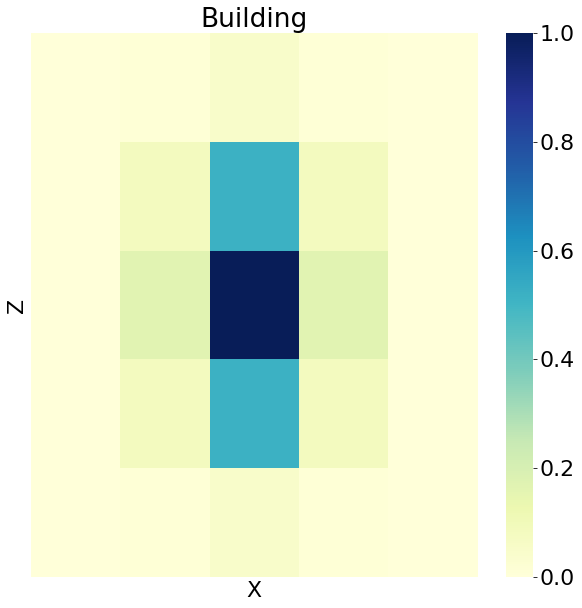

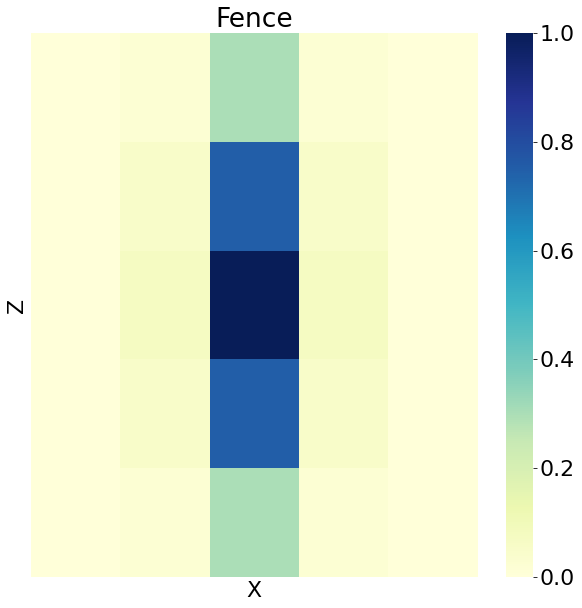

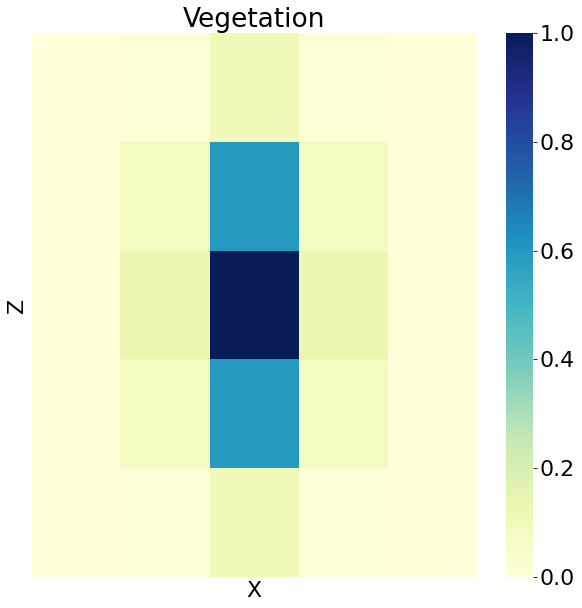

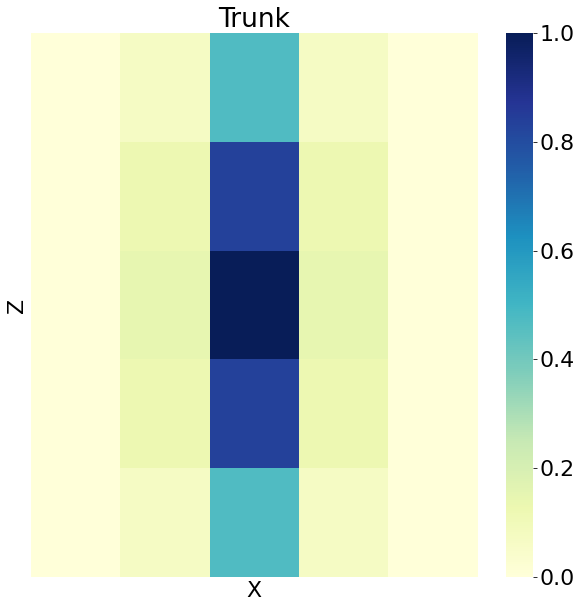

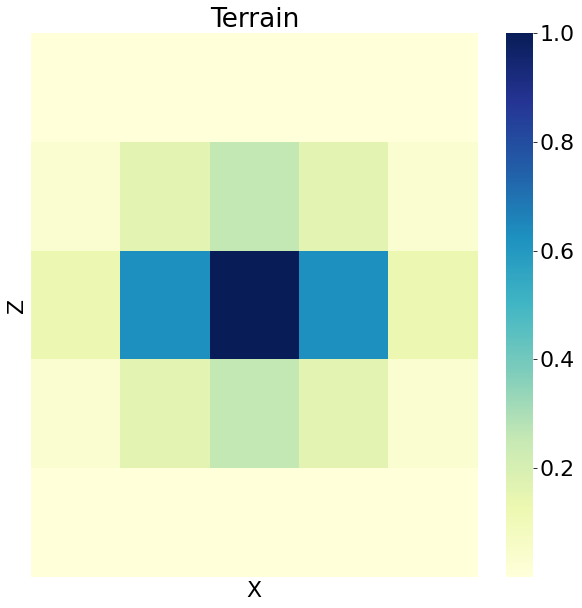

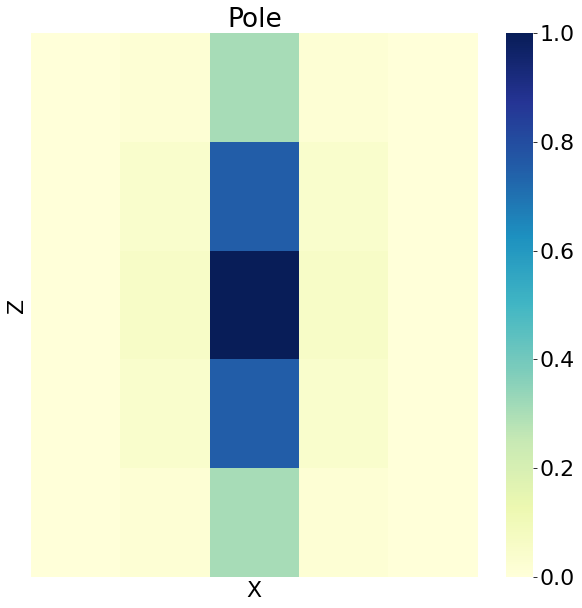

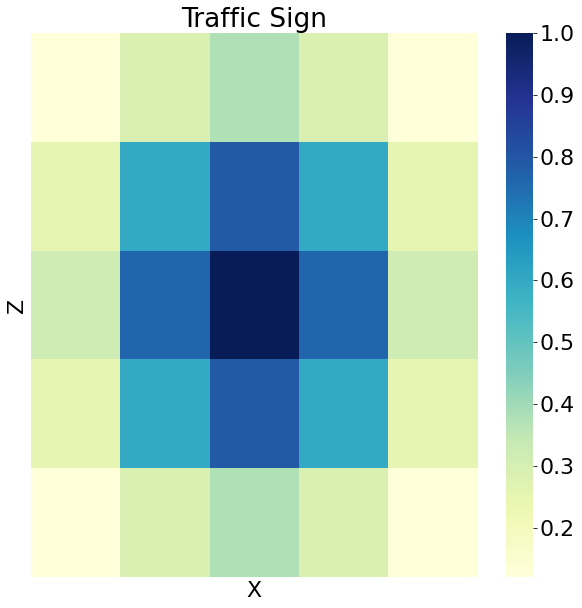

In [12]:
# Compound
MODEL_PATH = "/home/tigeriv/Code/NeuralBKI/Models/Weights/ConvBKI_COM_02_V/filters1.pt"
kernels = torch.load(MODEL_PATH).detach().cpu().numpy()
for i in range(20):
    plot_heatmap(kernels, i)